<a href="https://colab.research.google.com/github/Sahaswari/CNNDemo_/blob/main/CNNDemo_Student_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Implementation with PyTorch

Dataset: CIFAR10 (Ref: https://www.cs.toronto.edu/~kriz/cifar.html)
Info: <br>
> Number of Images: 60000,  32 * 32 in resolution
> Number of Classes: 10 (Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck)

**Prerequisites**
> PyTorch Basics: https://youtu.be/OIenNRt2bjg
> Python Basics: https://youtu.be/rfscVS0vtbw

**References:**
1. https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
2. https://wandb.ai/authors/ayusht/reports/Implementing-Dropout-Regularization-in-PyTorch--VmlldzoxNTgwOTE
3. https://medium.com/artificialis/dropout-regularization-using-pytorch-in-python-7765337cb158
3. https://pytorch.org/vision/stable/auto_examples/transforms/plot_transforms_illustrations.html#sphx-glr-auto-examples-transforms-plot-transforms-illustrations-py
4. https://pytorch.org/vision/main/datasets.html
5. https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
6. https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html#:~:text=Tensors%20are%20a%20specialized%20data,GPUs%20or%20other%20hardware%20accelerators.

## Load Google Drive

In [ ]:
# Load Google drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the Necessary Libraries

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary

## Define transforms (Data Augmentation)

In [ ]:
# Define transforms
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,0.5,0.5),std=(0.5,0.5,0.5))
])

# For training set
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,0.5,0.5),std=(0.5,0.5,0.5))
    ])


# For testing set


**Tensors**
> - Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.
> - Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data.
> - Tensors are also optimized for automatic differentiation.


# Load datasets and define the

Torchvision provides many built-in datasets in the torchvision.datasets module, as well as utility classes for building your own datasets (https://pytorch.org/vision/main/datasets.html).

> PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

In [ ]:
# Load datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_train)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Define batch size
batch_size = 25
# created dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)


**Try!**
Here we have used only two sets are training and the testing tests. However, for the hyperparameter tuning we need the validation set as well. Therefore, find out a solution to split the test set into two and, redo the dataset loading and dataloader preparation.

In [ ]:
# Define the classes in the dataset
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

## Display a Sample of Images

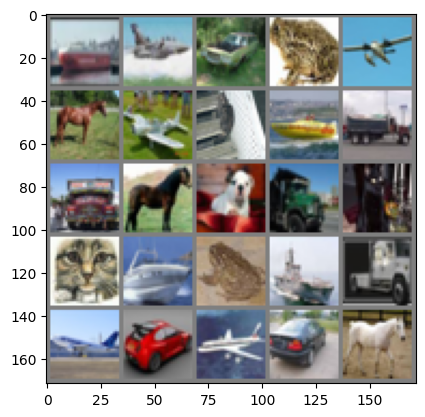

In [ ]:
# Visualize a batch of images

def imshow(img):
    img = img / 2 + 0.5;  # Unnormalized
    # Convert image into a Numpy Array for data manipuation and usage in
    # matplotlib
    npimg = img.numpy()
    # In numpy images defined as no. of channels, height, width format
    # However, matplotlib expects in height, width, channels format
    # So, we need to transform the npimg.
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Get some random training images
dataiter = iter(trainloader)
images,labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images, nrow=5))

# Print labels


## Define CNN

In [ ]:
# Define the CNN model
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.convl = nn.Conv2d(3,6,5,1,0)
    self.bn1 = nn.BatchNorm2d(6)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,3)
    self.bn2 = nn.BatchNorm2d(16)
    self.dropout = nn.Dropout(0.2)
    self.fcl = nn.Linear(16*6*6,144)
    self.bn3 = nn.BatchNorm1d(144)
    self.fc2 = nn.Linear(144,72)
    self.fc3 = nn.Linear(72,10)

  def forward(self,x):
    x = self.pool(F.relu(self.bn1(self.con1(x))))
    x = self.pool(F.relu(self.bn2(self.con2(x))))
    x = torch.flatten(x,1) #flatten all dimentions except batch
    x = F.relu(self.bn3(self.fc1(x)))
    x = self.dropout(x)
    x = F.relu(self.fc2(x))
    return self.fc3(x)

In [ ]:
# Initialize a instance of the model
model = CNN()

## Define the Device

In [ ]:
# If cuda GPU is available, it will be set as the device otherwise cpu
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# Transfer model to the devic
model.to(device)

CNN(
  (convl): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fcl): Linear(in_features=576, out_features=144, bias=True)
  (bn3): BatchNorm1d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=144, out_features=72, bias=True)
  (fc3): Linear(in_features=72, out_features=10, bias=True)
)

In [ ]:
# Generate model summary
summary(model,(3,32,32))


AttributeError: 'CNN' object has no attribute 'con1'

## Define the Loss Function and Optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.0001)

## Train the model

In [ ]:
# Train the defined model
for epoch in range(25): # loop over the dataset
  running_loss = 0.0
  for i, data in enumerate(trainloader):
    inputs, labels = data[0].to(device), data[1].to(device)

    # zero parameter gradients
    # means calculated gradients form ex=ach mini batches of data are added to any
    optimizer.zero_grad()

#  forward + backward + optimize
    output = model(inputs) #Forward pass
    loss = criterion(output, labels) #calcu;ate loss
    loss.backward() # back propegation
    optimizer.step() # learning

    #printing loss per each epoch
    running_loss += loss.item()
    if i % 2000 == 1999:
      print(f"[{epoch +1}, {i +1 :5d }] loss: {running_loss/2000:.3f}")
      running_loss = 0.0
print("Trining done")

AttributeError: 'CNN' object has no attribute 'con1'

## Model Saving and Loading

In [ ]:
# Saving
pATH = "/content/drive/"
torch.save(model.state_dict(0,PATH))



In [ ]:
# Loading
model =CNN()
model.load_state_(torch.load(PATH))


AttributeError: 'CNN' object has no attribute 'load_stat'

In [ ]:
# Once more send the model to the device after loading
model.to(device)
device



## Performance with Testset

In [ ]:
# Measure performance of the test set
correct = 0
total = 0

# since we are not traning , we do not need to claculate the gradiend for out outputs
with torch.no_grad():
  for data in testloader:
    images, labels = data[0].to(device), data[1].to (device)

    #claculate the outputs
    outputs = model(images)

    _,predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted ==labels).sum().item()

  print(f"Accurancy of the network on 1000 test: {100*correct / total} %")




AttributeError: 'CNN' object has no attribute 'con1'

**Try!**
In the above cases, we did not utilized any validation set and no hyperparameter tuning has been performed either. So model performance should be able to improve by performing some hyperparameter tuning.

**Try!**
Furthermore, try to measure the training and validation set losses/accuracies within the training loop and plot them in a single plot. In this way, we will be able to identify whether model is overfitting or not. In the above case, neither training or validation losses/accuracies were calculated. Try to record the performance once per certain number of batches.

**Try!**
Try to integrate early stopping into the training loop when the model performance w.r.t the validation set is no longer improving with further training. Try to think of a possible logic and add that into the training loop accordingly.

## Performance for Different Classes

In [ ]:
# Measure the performance w.r.t each class
correct_pred = {classname : 0 for classname in classes}
total_pred = {classname : 0 for classname in classes}

with torch.no_grad():
  for data in testloader:
    images, labels = data[0].to(divece), data(1).to(divice)

    outputs = model(images)
    _, predictions = torch.max(outputs,1)

for label, prediction in zip(labels, predictions):
  if label == prediction:
    correct_pred[classes[label]] += 1
  total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
  accuracy = 100*float(correct_count)/total_pred[classname]
  print(f"Accuancy for class {classname :5s} is {accuracy :.1f}%")

